In [1]:
#import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
import numpy as np
import cv2
import os

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
# Preprocessing
train = ImageDataGenerator(rescale=1/255)
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                    directory="../input/data-facemask/face mask",
                                                    shuffle=True,
                                                    target_size=(150,150), 
                                                    subset="training",
                                                    class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                        directory="../input/data-facemask/face mask",
                                                        shuffle=True,
                                                        target_size=(150,150), 
                                                        subset="validation",
                                                        class_mode='categorical')

Found 499 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [3]:
train_dataset.classes
train_dataset.class_indices

{'mask': 0, 'noMask': 1}

In [4]:
import numpy as np  #
import pandas as pd # xu ly mang
import seaborn as sns # do thi
import matplotlib.pyplot as plt # ve do hoa
from sklearn.preprocessing import StandardScaler  # xu ly du lieu , du lieu k dong deu
from sklearn.model_selection import train_test_split # chia du lieu 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM #  :batch... : chuan cua ANN
from keras.models import Sequential #
from tensorflow.keras.utils import to_categorical #  de dam bao do hcinh xac cao 
from keras import callbacks #
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score # thu vien cho do luong

In [5]:
# Tạo mô hinh
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))


2022-06-23 13:41:23.676100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 13:41:23.779824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 13:41:23.780680: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 13:41:23.782828: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
# Dùng CNN tách biên và giờ quay trở loại ANN để phân loại
from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.layers import Dense, Activation, Flatten


model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [7]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history=model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

2022-06-23 13:41:35.265372: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-06-23 13:41:36.775727: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


16/16 [==============================] - 11s 210ms/step - loss: 1.1040 - accuracy: 0.5832 - val_loss: 0.5225 - val_accuracy: 0.8952
Epoch 2/50
16/16 [==============================] - 1s 91ms/step - loss: 0.4671 - accuracy: 0.8317 - val_loss: 0.3575 - val_accuracy: 0.8468
Epoch 3/50
16/16 [==============================] - 1s 92ms/step - loss: 0.5604 - accuracy: 0.7475 - val_loss: 0.2989 - val_accuracy: 0.9516
Epoch 4/50
16/16 [==============================] - 2s 92ms/step - loss: 0.2165 - accuracy: 0.9279 - val_loss: 0.2463 - val_accuracy: 0.9113
Epoch 5/50
16/16 [==============================] - 2s 107ms/step - loss: 0.1645 - accuracy: 0.9479 - val_loss: 0.2040 - val_accuracy: 0.9355
Epoch 6/50
16/16 [==============================] - 1s 90ms/step - loss: 0.1927 - accuracy: 0.9198 - val_loss: 0.1496 - val_accuracy: 0.9516
Epoch 7/50
16/16 [==============================] - 1s 92ms/step - loss: 0.1239 - accuracy: 0.9599 - val_loss: 0.1374 - val_accuracy: 0.9516
Epoch 8/50
16/16 [===

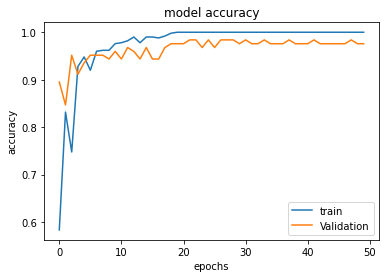

In [9]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

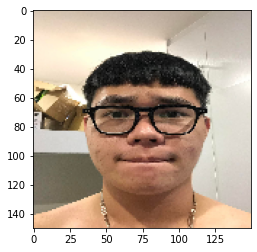

No Mask


In [13]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np 
filename = '../input/data-test/file_test/z3453394330947_4f835b7bf91f4da772dc0d02945ccd45.jpg'

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Mask")
if(kq==1):
    print("No Mask")


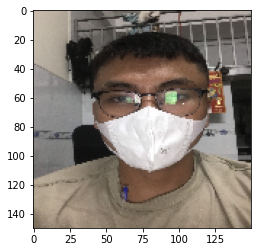

Mask


In [15]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np 
filename = '../input/data-test/file_test/z3515145026564_a3b65b9e086645d8097ac121bbef395d.jpg'

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Mask")
if(kq==1):
    print("No Mask")

In [14]:
# Save model
from tensorflow.keras.models import load_model
model.save('faceMask_model.h5')
model = load_model('faceMask_model.h5')

In [ ]:
model_save_path = 'face_mask_detection_model.h5'
checkpoint = ModelCheckpoint(model_save_path , monitor='val_accuracy' ,verbose=1 , save_best_only=True , mode='max')
callbacks_list = [checkpoint]
callbacks_list